## **Importing necessary libraries**

In [44]:
# import the important packages
import pandas as pd  # library used for data manipulation and analysis

import numpy as np  # library used for working with arrays

import matplotlib.pyplot as plt  # library for visualization

import seaborn as sns  # library for visualization

%matplotlib inline

import scipy.stats as stats  # this library contains a large number of probability distributions as well as a growing library of statistical functions

# Binomial Distribution

### Q1. A LED bulb manufacturing company regularly conducts quality checks at specified periods on the products it manufactures.  Historically, the failure rate for LED light bulbs that the company manufactures is 5%. Suppose a random sample of 10 LED light bulbs is selected. Find the probability distribution for the defective bulbs and answer the following questions.

In [2]:
from scipy.stats import binom
k = np.arange(0,11)
n = 10
p = 0.05

In [3]:
binomial = binom.pmf(k=k, n=n, p=p)

alternatively, you don't have to store the pmf() as a variable, you can plot directly with plt.bar(k, binom.pmf(k=k, n=n, p=p) or plt.bar(k=np.arange(1,11), n = 10, p = 0.05)

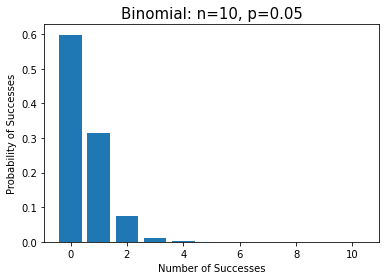

In [4]:
plt.bar(k, binomial)
plt.title('Binomial: n=%i, p=%.2f' % (n,p), fontsize=15)
plt.xlabel('Number of Successes')
plt.ylabel('Probability of Successes')
plt.show()

**a) What is the probability that none of the LED bulbs are defective?**

In [5]:
print('The probability that none of the LED bulbs are defective is: ', binomial[0], 
      '\nor about ', round(binomial[0]*100, 2), '%.', sep='')

The probability that none of the LED bulbs are defective is: 0.5987369392383787
or about 59.87%.


In [6]:
# alternatively to illustrate f-string formatting
print('The probability that none of the LED bulbs are defective is: %1.4f' % binomial[0])

The probability that none of the LED bulbs are defective is: 0.5987


In [8]:
# alternatively to illustrate f-string formatting
print('The probability that none of the LED bulbs are defective is: %2.2f' % round(binomial[0]*100, 2),'%', sep='')

The probability that none of the LED bulbs are defective is: 59.87%


**b) What is the probability that exactly one of the LED bulbs is defective?**

In [9]:
print('The probability that exactly one LED bulb is defective is ', binomial[1], '\nor about ', round(binomial[1] * 100, 2), '%.', sep='')

The probability that exactly one LED bulb is defective is 0.3151247048623047
or about 31.51%.


**c) What is the probability that two or fewer of the LED bulbs are defective?**

Hint: We need to calculate cumulative probability of two or fewer LED bulbs being defective.

In [10]:
print('The probability that two or fewer LED bulbs are defective is ', binom.cdf(k=2, n=n, p=p), '\nor about ', 
      round(binom.cdf(k=2, n=n, p=p)*100,2), '%.', sep='')

The probability that two or fewer LED bulbs are defective is 0.9884964426207031
or about 98.85%.


In [16]:
# alternativly to illustrate the f-string formatting
cumul_binom = binom.cdf(k,n,p)
print('The probability that two or fewer LED bulbs are defictive is: %2.2f' % cumul_binom[2] + '%')

The probability that two or fewer LED bulbs are defictive is: 0.99%


**d) What is the probability that three or more of the LED bulbs are defective?**

Hint: We need to subtract the cumulative probability of up to 2 defective LED bulbs from 1.

In [28]:
three_plus = 1-cumul_binom[2]
print('The probability that two or fewer LED bulbs are defictive is: %2.5f' % three_plus + '\nor about %2.2f' % (three_plus*100) + '%')

The probability that two or fewer LED bulbs are defictive is: 0.01150
or about 1.15%


In [29]:
# alternatively without saving a variable to memory
print('The probability that two or fewer LED bulbs are defective is ', 1-binom.cdf(k=2, n=n, p=p), '\nor about ', 
      round(1-binom.cdf(k=2, n=n, p=p),4)*100, '%.', sep='')

The probability that two or fewer LED bulbs are defective is 0.01150355737929687
or about 1.15%.


### Q2. During an NBA game, a basketball player has two foul shots (free throw) and the conversion rate of free-throw shots is 93%. Find the following probabilities.

**a) What is the probability that the player will convert both the shots?**

In [30]:
# check the pmf for all shot-make options
ff_prob = binom.pmf(k=[0,1,2], n = 2, p = 0.93)
ff_prob

array([0.0049, 0.1302, 0.8649])

In [31]:
print('The probability that a player will make both shots is ', round(ff_prob[2]*100, 2), '%.', sep='')

The probability that a player will make both shots is 86.49%.


In [32]:
# simpler alternative
print('The probability that a player will make both shots is ', round(binom.pmf(2,2,0.93)*100, 2), '%.', sep='')

The probability that a player will make both shots is 86.49%.


**b) What is the probability that the player will convert at least one shot?**

In [33]:
# binom.cdf()
print('The probability that a player will make at least one shot is ', round(1-binom.cdf(0,2,0.93), 4)*100, '%.', sep='')
# note the * 100 has to go after the round() when using 1 minus cdf() 
# note that 4 places are required in the round() because you are *100 after the round, moving the decimal

The probability that a player will make at least one shot is 99.51%.


### Q3.	Over a long period in a large multinomial corporation, 10% of all sales trainees are rated as outstanding, 75% are rated as excellent, 10% are rated as satisfactory and 5% are considered unsatisfactory. Find the following probabilities for a sample of 10 trainees selected at random.

**a) Two are rated as outstanding**

In [ ]:
outstanding = binom.pmf(2, 10, 0.10)
print('The probability that 2 out of 10 are rated outstandint is: %1.5f' % outstanding, '\nor about ', round(outstanding*100, 2), '%.',sep='')

The probability that 2 out of 10 are rated outstandint is: 0.19371
or about 19.37%.


**b) Two or more are rated as outstanding**

In [ ]:
print('The probability that two or more are rated as outstanding is: %1.5f' % (1-binom.cdf(1, 10, 0.10)), '\nor about ', 
      round(1-binom.cdf(1,10,0.10),4)*100, '%.', sep='')
# note, must put function in () to utlize f-string formatting, (so the % applies to the whole 1-binom.cdf() function)

The probability that two or more are rated as outstanding is: 0.26390
or about 26.39%.


**c) Eight of the ten are rated either outstanding or excellent**

In [ ]:
# probability of excellent or outstanding 0.75 + 0.10 = 0.85

binomial_8_exc_out = binom.pmf(8, 10, 0.85)
print('The probability that 8 out of 10 are either excellent or outstanding is', round(binomial_8_exc_out,5))

The probability that 8 out of 10 are either excellent or outstanding is 0.2759


In [ ]:
# alternative using f-string
binomial_8_exc_out = binom.pmf(8, 10, 0.85)
print('The probability that 8 out of 10 are either excellent or outstanding is %1.5f' % binomial_8_exc_out)

The probability that 8 out of 10 are either excellent or outstanding is 0.27590


**d) None of the trainees are rated as unsatisfactory**

In [42]:
binomial_0_unsat = binom.pmf(0, 10, 0.05)
print('The probability that zero out of 10 are rated unsatasfactory is : %1.5f' % binomial_0_unsat,
      '\nor about ', round(binomial_0_unsat*100, 2), '%', sep='')

The probability that zero out of 10 are rated unsatasfactory is : 0.59874
or about 59.87%


# Normal Distribution

In [46]:
from scipy.stats import norm

### Q4. According to the Telecommunication Industry, the average monthly cell phone bill is Rs. 850 with a standard deviation of Rs. 150. Assuming that the monthly bill follows a normal distribution, answer the following questions.

**a) What is the probability that a randomly selected cell phone bill is more than Rs 1200?**

In [52]:
rb_greater_1200 = 1-norm.cdf(1200, 850, 150)
round(n_r_1200,4)

0.0098

**b) What is the probability that a randomly selected cell phone bill is between Rs 750 and Rs 1200?**

In [54]:
rb_lessthan_1200 = norm.cdf(1200, 850, 150)
rb_lessthan_750 = norm.cdf(750, 850, 150)
round(rb_lessthan_1200 - rb_lessthan_750, 4)

0.7377

**c) What is the probability that a randomly selected cell phone bill is no more than Rs 650?**

In [62]:
print(round(norm.cdf(650, 850, 150), 4), ' or ', round(norm.cdf(650, 850, 150)*100, 2), '%', sep='')

0.0912 or 9.12%


**d) What is the amount above which lies top 15% of cell phone bills?**

In [66]:
round(norm.ppf(0.85, 850, 150), 2)

1005.47

**e) What is the amount below which lies bottom 25% of cell phone bills?**

In [65]:
round(norm.ppf(0.25, 850, 150), 2)

748.83

### Q5. The mean filling capacity for a coke bottle is 500 ml with a standard deviation of 20 ml. Assume that it follows a normal distribution and answer the following questions.

**a) What is the probability that the bottle filled less than 480 ml?**

In [89]:
# more throuough setup 
mu = 500
sigma = 20

In [86]:
# calculation with z-scores along the way for fun
x1 = 480

print( 'using x1:', norm.cdf(x1, mu, sigma))

# calculated z_score if needed later
z1 = (x1-mu)/sigma
p = norm.cdf(z1)
print('using z1:', p)
print('480ml is exactly one standard deviation below the mean, here is the z_score:',z1)

using x1: 0.15865525393145707
using z1: 0.15865525393145707
480ml is exactly one standard deviation below the mean, here is the z_score: -1.0


In [82]:
# simplest and least cumpute power required
norm.cdf(480, 500, 20)

0.15865525393145707

**b) What is the probability that the bottle filled more than 520 ml?**

In [83]:
1-norm.cdf(520, 500, 20)

0.15865525393145707

**c) What is the probability that the bottle filled between 470 ml to 525 ml?**

In [87]:
# simplest and least compute power required
norm.cdf(525, 500, 20) - norm.cdf(470, 500, 20)

0.8275430250642866

In [92]:
# alternativly you could calculate with variable for use later, and z-scores along the way if needed later
x3 = 470
z3 = (x3-mu)/sigma
x4 = 525
z4 = (x4-mu)/sigma

p3 = norm.cdf(z3)
p4 = norm.cdf(z4)
p5 = p4 - p3
print('The probability that a bottle is filled between 470ml and 525ml is: %1.4f' % p5,
      '\nor about ', round(p5,2), '%.', sep='')

The probability that a bottle is filled between 470ml and 525ml is: 0.8275
or about 0.83%.


### Q6. In 2 Liter soft drink bottles, the drink filled is normally distributed, with a mean of 2.0 liters and a standard deviation of 0.05 liter. If bottles contain less than 95% of the listed net content (1.90 liters), the manufacturer may be subject to penalty by the state office of consumer affairs. Bottles that have a net quantity above 2.1 liters may cause excess spillage upon opening. Answer the following questions.

In [118]:
mu1 = 2
sigma1 = 0.05

**a) What is the probability that the bottle content is between 1.9 and 2.0 liters?**

In [94]:
norm.cdf(2, mu1, sigma1) - norm.cdf(1.9, mu1, sigma1)


0.4772498680518209

In [99]:
# alternatively
x1 = norm.cdf(2, mu1, sigma1)
x2 = norm.cdf(1.9, mu1, sigma1)
print('The probability that a bottle will be filled between 1.9 and 2 liters is ',x1-x2,
      '\nor about ', round((x1-x2)*100, 2),'%.', sep='')

The probability that a bottle will be filled between 1.9 and 2 liters is 0.4772498680518209
or about 47.72%.


**b) What is the probability that the bottle content is between 1.9 and 2.1 liters?**

In [113]:
x3 = norm.cdf(2.1, mu1, sigma1)
print('The probability that a bottle will be filled between 1.9 and 2.1 liters is, ', x3 - x2,
      '\nor about ', round((x3-x2)*100, 2), '%.', sep='')

The probability that a bottle will be filled between 1.9 and 2.1 liters is, 0.9544997361036418
or about 95.45%.


**c) What is the probability that the bottle content is below 1.9 liters or above 2.1 liters?**

In [116]:
p1 = x3 - x2
print('The probability of a bottle being below 1.9 or above 2.1 liters is: ',1-p1, '\nor about ',
      round((1-p1) * 100,2), '%.', sep='')

The probability of a bottle being below 1.9 or above 2.1 liters is: 0.045500263896358195
or about 4.55%.


**d) 99% of the bottles contains at least what amount of soft drink in them?**

In [123]:
print('99% of bottles have at least', round(norm.ppf(0.01, mu1, sigma1),2), 'liters.')

99% of bottles have at least 1.88 liters.


quiz scratch


In [124]:
norm.cdf(590, 502, 115) - norm.cdf(400, 502, 115)

0.5903777927789047

In [125]:
binom.cdf(3, 7, 0.75)

0.070556640625